In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

## Load Data

In [2]:
# load the original data
survey = pd.read_csv('data/preprocessed.csv')
survey.head()

,Unnamed: 0,timestamp,gender,age,language,EQ_score_raw,SQ_score_raw,EQ_score_std,SQ_score_std,D_score,...,covid_6,covid_7,covid_8,covid_9,covid_10,covid_11,covid_12,covid_13,covid_14,covid_15
0,0,2020/05/03 6:49:52 am GMT+8,M,23,English,7.0,4.0,0.106993,-0.162937,0.26993,...,2.0,5.0,Yes,Yes,Yes,No,Yes,No,2.0,3.0
1,1,2020/05/03 6:53:20 am GMT+8,M,22,English,5.0,4.0,0.006993,-0.162937,0.16993,...,1.0,4.0,Yes,Yes,Yes,No,Yes,Yes,2.0,3.0
2,2,2020/05/03 3:53:12 pm GMT+8,F,22,English,7.0,9.0,0.106993,0.087063,0.01993,...,2.0,5.0,Yes,Yes,Yes,No,Yes,No,1.0,1.0
3,3,2020/05/03 7:35:55 pm GMT+8,M,28,English,4.0,8.0,-0.043007,0.037063,-0.08007,...,1.0,5.0,Yes,Yes,Yes,Yes,Yes,No,2.0,3.0
4,4,2020/05/03 8:38:20 pm GMT+8,M,32,English,5.0,13.0,0.006993,0.287063,-0.28007,...,1.0,5.0,No,No,No,No,Yes,No,1.0,3.0


## Check difference in EA scores between genders and nationalities

(array([  3.,   6.,  17.,  32., 112., 155., 115.,  71.,  23.,   8.]),
 array([-4.86615175, -4.01044392, -3.1547361 , -2.29902827, -1.44332045,
        -0.58761263,  0.2680952 ,  1.12380302,  1.97951085,  2.83521867,
         3.69092649]),
 <a list of 10 Patch objects>)

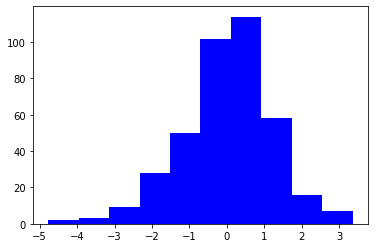

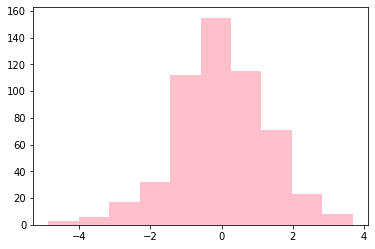

In [3]:
men_ea  = survey[survey['gender']=='M']['EA_score']
women_ea  = survey[survey['gender']=='F']['EA_score']
plt.hist(men_ea,color='blue')
plt.figure()
plt.hist(women_ea,color='pink')

In [4]:
t, pval = scipy.stats.ttest_ind(men_ea, women_ea)
print(pval)

0.8191074848014204


Conclusion: No significant difference between EA score of men and women

In [5]:
en_ea  = survey[survey['language']=='English']['EA_score']
fr_ea  = survey[survey['language']=='French']['EA_score']
tu_ea  = survey[survey['language']=='Turkish']['EA_score']
ch_ea  = survey[survey['language']=='Chinese']['EA_score']

Text(0.5, 1.0, 'Chinese')

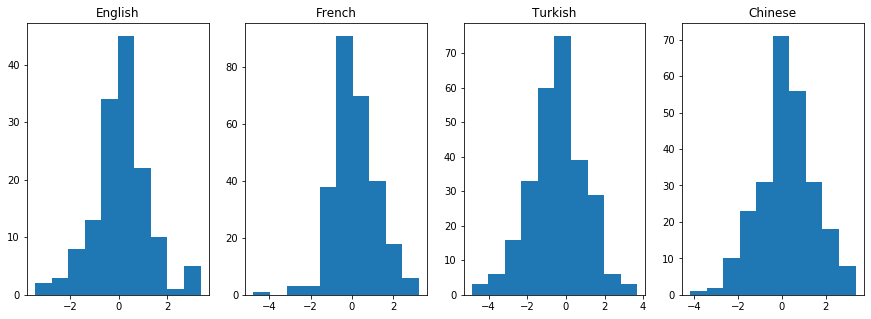

In [6]:
fig, axs = plt.subplots(1,4, figsize=(15,5))
axs[0].hist(en_ea)
axs[0].set_title('English')
axs[1].hist(fr_ea)
axs[1].set_title('French')
axs[2].hist(tu_ea)
axs[2].set_title('Turkish')
axs[3].hist(ch_ea)
axs[3].set_title('Chinese')

In [7]:
print("English mean: {0}".format(np.mean(en_ea)))
print("French mean: {0}".format(np.mean(fr_ea)))
print("Turkish mean: {0}".format(np.mean(tu_ea)))
print("Chinese mean: {0}".format(np.mean(ch_ea)))

English mean: 0.12253616931322582
French mean: 0.1556019230981317
Turkish mean: -0.4213108892458712
Chinese mean: 0.216010950789236


In [8]:
t, pval = scipy.stats.ttest_ind(en_ea, tu_ea)
print(pval)

6.750039696300751e-05


Conclusion: There is a significant difference in the EA scores of English and Turkish speakers, with Turkish people being more allocentric than egocentric

In [9]:
t, pval = scipy.stats.ttest_ind(fr_ea, tu_ea)
print(pval)
t, pval = scipy.stats.ttest_ind(ch_ea, tu_ea)
print(pval)

9.704698722686242e-08
8.89771397621511e-08


Conclusion: Turkish people are significantly more allocentric than French and Chinese people

In [10]:
oldness_cutoff = 35
young_ea  = survey[survey['age']<oldness_cutoff]['EA_score']
old_ea  = survey[survey['age']>=oldness_cutoff]['EA_score']
print("Old mean: {0}".format(np.mean(old_ea)))
print("Young mean: {0}".format(np.mean(young_ea)))
t, pval = scipy.stats.ttest_ind(young_ea, old_ea)
print(pval)

Old mean: -0.0904100878279177
Young mean: 0.11605206872776688
0.0129187507810094


## Check correlation between EQ/SQ and EA Score 
EA Score = Egocentric score - allocentric score

(934,)
(934,)


Text(0, 0.5, 'EA Score')

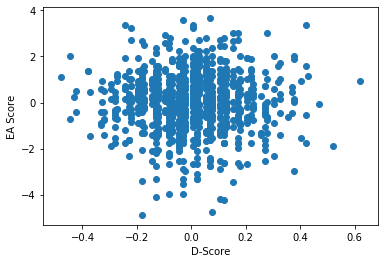

In [11]:
d_score = survey['D_score'].to_numpy()
print(d_score.shape)
ea_score = survey['EA_score'].to_numpy()
print(ea_score.shape)
plt.figure()
plt.scatter(d_score,ea_score)
plt.xlabel("D-Score")
plt.ylabel("EA Score")

In [12]:
result = scipy.stats.linregress(d_score, ea_score)
print(result.rvalue)
print(result.pvalue)

0.0013061881070071974
0.9682003448332829


Conclusion: No correlation between D-score and EA score

## Check correlation between age and EA score / D-score

Text(0, 0.5, 'EA Score')

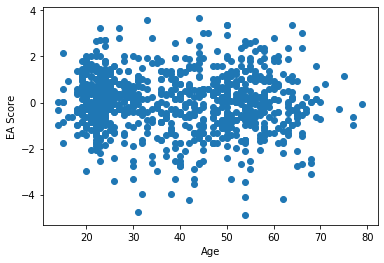

In [13]:
ages = survey['age'].to_numpy()
plt.figure()
plt.scatter(ages,ea_score)
plt.xlabel("Age")
plt.ylabel("EA Score")

In [14]:
result = scipy.stats.linregress(ages, ea_score)
print(result.rvalue)
print(result.pvalue)

-0.06398527064015833
0.050598999206870374


Conclusion: Barely a siginificant negative correlation between age and EA score

Text(0, 0.5, 'D-Score')

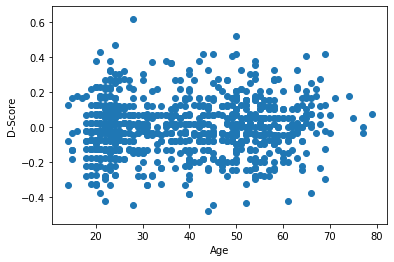

In [15]:
plt.figure()
plt.scatter(ages,d_score)
plt.xlabel("Age")
plt.ylabel("D-Score")

In [16]:
result = scipy.stats.linregress(ages, d_score)
print(result.rvalue)
print(result.pvalue)

0.07484551337530394
0.02216486763378601


Conclusion: Significant positive correlation between age and D-score

## Correlation between EA Score and COVID questions

In [17]:
numeric_covid_answers = [1,2,3,4,6,7,14,15]
for num in numeric_covid_answers:
    key = 'covid_' + str(num)
    data = survey[key]
    result = scipy.stats.linregress(ages, data)
    if result.pvalue < 0.05:
        print("Question {0} siginificantly correlated to EA with r-value {1} and p-value {2}".format(num,result.rvalue,result.pvalue))

Question 1 siginificantly correlated to EA with r-value 0.11187871757475278 and p-value 0.0006140034273622205
Question 4 siginificantly correlated to EA with r-value -0.1296178252509365 and p-value 7.104176240232286e-05
Question 7 siginificantly correlated to EA with r-value -0.258922825661193 and p-value 8.987621734305648e-16
Question 14 siginificantly correlated to EA with r-value 0.14203005631779034 and p-value 1.3189836339628401e-05
Question 15 siginificantly correlated to EA with r-value 0.16376071975598525 and p-value 4.852255397522782e-07


Conclusion: People with a higher EA score (i.e. more egocentric) are significantly less concerned about COVID, more likely to comply with social distancing, think that their country's SD guidelines are too strict, and are not willing to deliver groceries to a sick family member or stranger

In [18]:
tf_covid_answers = np.array(range(8,14))
for num in tf_covid_answers:
    key = 'covid_' + str(num)
    yes_ea  = survey[survey[key]=='Yes']['EA_score']
    no_ea  = survey[survey[key]=='No']['EA_score']
    t, pval = scipy.stats.ttest_ind(en_ea, tu_ea)
    if pval < 0.05:
        print("Question {0} p-val {1}".format(num,pval))
        print("Yes mean: {0}".format(np.mean(yes_ea)))
        print("No mean: {0}".format(np.mean(no_ea)))

Question 8 p-val 6.750039696300751e-05
Yes mean: -0.12936264299256592
No mean: 0.14775824818875635
Question 9 p-val 6.750039696300751e-05
Yes mean: -0.07870666267860424
No mean: 0.1886097843825457
Question 10 p-val 6.750039696300751e-05
Yes mean: -0.07704746947378598
No mean: 0.19348763010710118
Question 11 p-val 6.750039696300751e-05
Yes mean: -0.06794558758118165
No mean: 0.08172700393019448
Question 12 p-val 6.750039696300751e-05
Yes mean: -0.0391791995499486
No mean: 0.3304508244869397
Question 13 p-val 6.750039696300751e-05
Yes mean: 0.03191346520489523
No mean: -0.010668215511350837


Conclusion: People who do not wear masks (Q 9-10) and do not wash their hands (Q 11-12) have significantly higher EA scores than those who do. People who would go grocery shopping with a cough (Q13) have higher EA scores.